# Practical Session: Visualization

For any question you can send me an email at valentin.penaud_polge@mines-paristech.fr


Biases in data can significantly change what a model learns. This can lead to critical and unacceptable
mistakes in the decisions made by the model. For several application domains (medical, justice, etc), the decision of a deep learing model needs to be understood and a particular attention is required to avoid such biases. To do so, visualization methods have been proposed.

In this practical session we will use several visualization methods to determine the effect of a bias in the
data on what a model learns from the training dataset. These methods will be applied in both cases
(biased and non-biased images) in order to compare their results.

In [1]:
import numpy as np 
import tensorflow 
from tensorflow.keras.datasets import mnist as db 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt 
 
 
%matplotlib inline 
# matplotlib default values 
plt.rcParams['figure.figsize'] = (10.0, 10.0) 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
%load_ext autoreload 
%autoreload 2

## Non-Biased Images

We will use the fashion-MNIST dataset. You can see details about it here https://github.com/zalandoresearch/fashion-mnist

The first part of this pratical session will consists on applying three visualization methods to a model trained with non-biased images (the original dataset). The results obtained will be used in the second part of the practical session as references for comparison.

### Prepare and visualize data

In [48]:
# Load images
(x, y), (x_test, y_test_n) = tensorflow.keras.datasets.fashion_mnist.load_data() 
 
# Split between x and y into a training and validatino datasets
x_val, y_val_n = x[:10000], y[:10000] 
x_train, y_train_n = x[10000:], y[10000:] 
 
# Print shapes
print('x_val shape : ', x_val.shape) 
print('x_train shape : ', x_train.shape) 
print('x_test shape : ', x_test.shape)

x_val shape :  (10000, 28, 28)
x_train shape :  (50000, 28, 28)
x_test shape :  (10000, 28, 28)


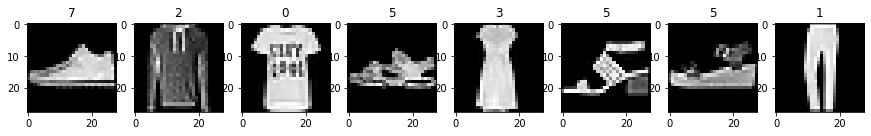

In [49]:
# Show some images of the train datasets

plt.figure(figsize = (15, 10)) 
for i in range(8): 
    plt.subplot(1, 8, i+1), plt.imshow(x_train[i + 5,:,:]), plt.title(y_train_n[i + 5])
plt.show()

In [50]:
print(x_train[0,:,:].shape)

(28, 28)


In [4]:
## Prepare data for the model 
num_classes = 10 
input_shape = (28, 28, 1)
 
x_train = x_train.astype('float32')/255 
x_train = tensorflow.expand_dims(x_train, axis = -1) # add a channel dimension
 
x_val = x_val.astype('float32')/255 
x_val = tensorflow.expand_dims(x_val, axis = -1) # add a channel dimension
 
x_test = x_test.astype('float32')/255 
x_test = tensorflow.expand_dims(x_test, axis = -1) # add a channel dimension
 
y_train = to_categorical(y_train_n, num_classes) 
y_val = to_categorical(y_val_n, num_classes) 
y_test = to_categorical(y_test_n, num_classes)

### Model definition and training

In [5]:
## Model 
 
model = Sequential() 
 
model.add(Conv2D(16, 7, activation='relu', padding = 'same', input_shape=input_shape))
model.add(MaxPool2D()) 
#model.add(Dropout(0.2))   # uncomment to add the Dropout layer 
model.add(Conv2D(32, 3, activation='relu', padding = 'same')) 
model.add(MaxPool2D()) 
#model.add(Dropout(0.2))   # uncomment to add the Dropout layer 
model.add(Conv2D(64, 3, activation='relu', padding = 'same')) 
#model.add(Dropout(0.1))   # uncomment to add the Dropout layer 
model.add(GlobalAveragePooling2D(name = 'GAP')) 
model.add(Dense(num_classes, activation='softmax', name="last")) 
 
model.summary() # show a summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
GAP (GlobalAveragePooling2D) (None, 64)                0         
_________________________________________________________________
last (Dense)                 (None, 10)                6

<ins> Assignment 1 :</ins> What does a Dropout layer do to its input ?

Answer (assignment 1): a dropout layer ignores randomly some of the input neurons: it randomly sets to zero some inputs. It can be used to reduce overfitting for example.

In [6]:
# Define the loss, optimizer and the metric(s) 
learning_rate = 0.001 
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=learning_rate), 
              metrics=['accuracy'])

In [7]:
# Train the model
batch_size = 64 
epochs = 35 
history = model.fit(x_train, y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, validation_data = (x_val, y_val), verbose = 1)

Epoch 1/35
782/782 [==============================] - 57s 71ms/step - loss: 0.9468 - accuracy: 0.6506 - val_loss: 0.6799 - val_accuracy: 0.7432
Epoch 2/35
782/782 [==============================] - 56s 71ms/step - loss: 0.6488 - accuracy: 0.7593 - val_loss: 0.6005 - val_accuracy: 0.7742
Epoch 3/35
782/782 [==============================] - 56s 71ms/step - loss: 0.5846 - accuracy: 0.7850 - val_loss: 0.5364 - val_accuracy: 0.8060
Epoch 4/35
782/782 [==============================] - 56s 71ms/step - loss: 0.5377 - accuracy: 0.8057 - val_loss: 0.5054 - val_accuracy: 0.8180
Epoch 5/35
782/782 [==============================] - 56s 72ms/step - loss: 0.5013 - accuracy: 0.8184 - val_loss: 0.5011 - val_accuracy: 0.8185
Epoch 6/35
782/782 [==============================] - 56s 71ms/step - loss: 0.4676 - accuracy: 0.8332 - val_loss: 0.4632 - val_accuracy: 0.8353
Epoch 7/35
782/782 [==============================] - 54s 69ms/step - loss: 0.4429 - accuracy: 0.8423 - val_loss: 0.4154 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

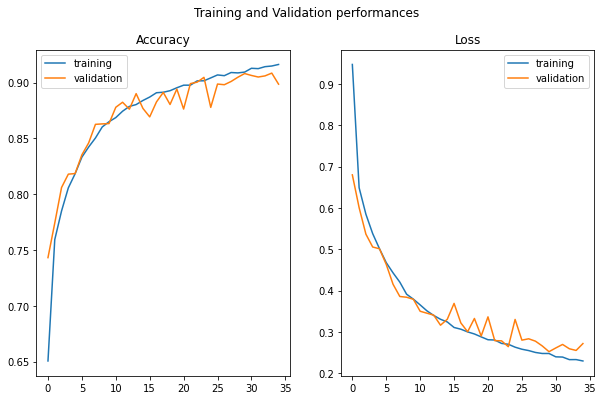

In [8]:
# Show the training curves
plt.figure(figsize = (10, 6))
plt.suptitle('Training and Validation performances')
plt.subplot(1, 2, 1), plt.plot(history.history['accuracy'], label = 'training'), plt.title('Accuracy')
plt.subplot(1, 2, 1), plt.plot(history.history['val_accuracy'], label = 'validation')
plt.subplot(1, 2, 1), plt.legend()
plt.subplot(1, 2, 2), plt.plot(history.history['loss'], label = 'training'), plt.title('Loss')
plt.subplot(1, 2, 2), plt.plot(history.history['val_loss'], label = 'validation')
plt.subplot(1, 2, 2), plt.legend()
plt.show()

In [9]:
# Evaluate the model with the test dataset
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.3022 - accuracy: 0.8928


In [10]:
## Model_dropout
 
model_dropout = Sequential() 
 
model_dropout.add(Conv2D(16, 7, activation='relu', padding = 'same', input_shape=input_shape))
model_dropout.add(MaxPool2D()) 
model_dropout.add(Dropout(0.2))   # uncomment to add the Dropout layer 
model_dropout.add(Conv2D(32, 3, activation='relu', padding = 'same')) 
model_dropout.add(MaxPool2D()) 
model_dropout.add(Dropout(0.2))   # uncomment to add the Dropout layer 
model_dropout.add(Conv2D(64, 3, activation='relu', padding = 'same')) 
model_dropout.add(Dropout(0.1))   # uncomment to add the Dropout layer 
model_dropout.add(GlobalAveragePooling2D(name = 'GAP')) 
model_dropout.add(Dense(num_classes, activation='softmax', name="last")) 
 
model_dropout.summary() # show a summary of the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        800       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)         

In [11]:
# Define the loss, optimizer and the metric(s) 
learning_rate = 0.001 
model_dropout.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=learning_rate), 
              metrics=['accuracy'])

In [12]:
# Train the model
batch_size = 64 
epochs = 35 
history = model_dropout.fit(x_train, y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, validation_data = (x_val, y_val), verbose = 1)

Epoch 1/35
782/782 [==============================] - 62s 79ms/step - loss: 1.0050 - accuracy: 0.6265 - val_loss: 0.6802 - val_accuracy: 0.7578
Epoch 2/35
782/782 [==============================] - 61s 78ms/step - loss: 0.6706 - accuracy: 0.7554 - val_loss: 0.6268 - val_accuracy: 0.7622
Epoch 3/35
782/782 [==============================] - 61s 78ms/step - loss: 0.5997 - accuracy: 0.7811 - val_loss: 0.5317 - val_accuracy: 0.8108
Epoch 4/35
782/782 [==============================] - 61s 78ms/step - loss: 0.5528 - accuracy: 0.8014 - val_loss: 0.4742 - val_accuracy: 0.8302
Epoch 5/35
782/782 [==============================] - 62s 79ms/step - loss: 0.5192 - accuracy: 0.8140 - val_loss: 0.4953 - val_accuracy: 0.8170
Epoch 6/35
782/782 [==============================] - 61s 78ms/step - loss: 0.4892 - accuracy: 0.8253 - val_loss: 0.4204 - val_accuracy: 0.8506
Epoch 7/35
782/782 [==============================] - 62s 79ms/step - loss: 0.4711 - accuracy: 0.8326 - val_loss: 0.4254 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

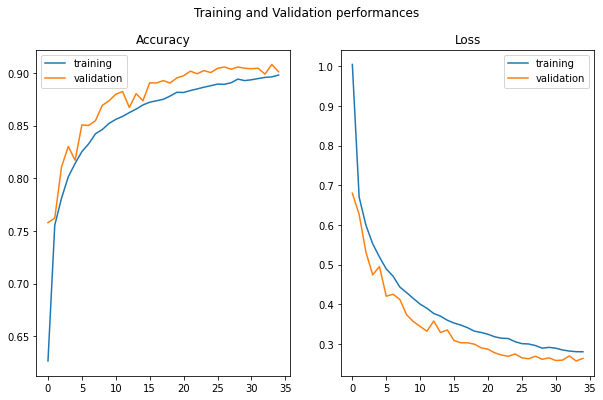

In [13]:
# Show the training curves
plt.figure(figsize = (10, 6))
plt.suptitle('Training and Validation performances')
plt.subplot(1, 2, 1), plt.plot(history.history['accuracy'], label = 'training'), plt.title('Accuracy')
plt.subplot(1, 2, 1), plt.plot(history.history['val_accuracy'], label = 'validation')
plt.subplot(1, 2, 1), plt.legend()
plt.subplot(1, 2, 2), plt.plot(history.history['loss'], label = 'training'), plt.title('Loss')
plt.subplot(1, 2, 2), plt.plot(history.history['val_loss'], label = 'validation')
plt.subplot(1, 2, 2), plt.legend()
plt.show()

In [14]:
# Evaluate the model with the test dataset
score = model_dropout.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.2851 - accuracy: 0.8980


<ins> Assignment 2 :</ins> Train the network with and without the Dropout Layers and witness the training and validation performances. What is the advantage of using the Dropout layers ?

The training performance is slightly better with the basic model. However, the validation performance (the one we care about) is better with the dropout layers. We can therefore suppose that dropout layers reduce overfitting, and allows the model to generalize well.

Taking a look at the history, we notice that adding dropout layers adds a burden to the model: the validation performance is always better than the training one. This burden is actually what helps the model not to overfit.

### Classification activation maps (grad-CAM)

We will use the tf-keras-vis toolkit (https://github.com/keisen/tf-keras-vis). Please make sure that it is
installed and otherwise just pip install it ! We recall that Grad-CAM aims to visualize the part of the image
contributing the most to the predection.

In [15]:
#!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.5 MB/s 


In [16]:
from tf_keras_vis.gradcam import Gradcam

Let's choose a test image, visualize it and predict its label.

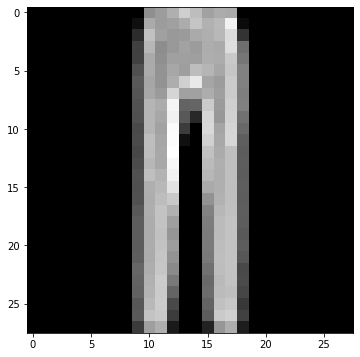

Shape of the prediction :  (1, 10)
Predicted class :  1 ; True class :  1


In [18]:
index_image = 24 # index_image = 24 -> a trouser image.
 
image = x_test[index_image, :,:,:] 
 
plt.figure(figsize = (6,6)) 
plt.imshow(image[:,:,0]) 
plt.show() 
 
image = tensorflow.expand_dims(image, axis = 0) # add a batch dimension.
 
# Predict the output of the image.
prediction = model.predict(image) 
 
# print the shape of the prediction, the predicted class and the true one.
print('Shape of the prediction : ', prediction.shape)

print('Predicted class : ', np.argmax(prediction), '; True class : ', np.argmax(y_test[index_image]))

Some functions we need:

In [19]:
def model_modifier(m): 
    m.layers[-1].activation = tensorflow.keras.activations.linear 
    return m 
 
def loss(prediction): 
    # the loss gives the score of the image for the correct class.  
    # if you want to test the importance for the prediction of another class 
    # you have to adapt the index accordingly. 
    correct_class_index = np.argmax(prediction) 
    return prediction[0][correct_class_index]

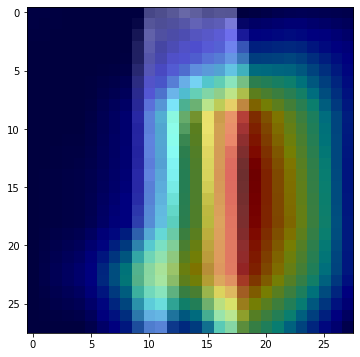

In [20]:
from tf_keras_vis.utils import normalize 
from matplotlib import cm 
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object 
gradcam = Gradcam(model, 
                  model_modifier=model_modifier, 
                  clone=True) 
 
# Generate heatmap with GradCAM 
cam = gradcam(loss, 
              image, 
              penultimate_layer=-1, # model.layers number 
            ) 
cam = normalize(cam) 
plt.figure(figsize = (6,6)) 
plt.imshow(image[0,:,:,0]) 
heatmap = np.uint8(cm.jet(cam[0]) * 255) 
plt.imshow(heatmap, cmap='jet', alpha=0.5) 
plt.show()

### Activation maximization

We visualized activations of images by using grad-CAM. Now we will visualize properties of the network itself. A popular method is the activation maximization, where we seek an image that would maximize a given neuron inside the network.

For this, we solve the maximization problem:
$$ x^{*} = \text{argmax}_{x} z\left(x\right) $$
where $z\left(x\right)$ is the value of an arbitrary neuron (or a set of neurons, e.g. the neurons in one feature map) in the network.

Typically, $z\left(x\right)=S_c\left(x\right)$ is the value of the output layer for one particular class. We therefore seek the image that maximizes the output for a particular class.

We recall the indexes of the classes :<br>
0 -> T-shirt/top ; 1 -> Trouser ; 2 -> Pullover ; 3 -> Dress ; 4 -> Coat ; 5 -> Sandal ; 6 -> Shirt ; 7 -> Sneaker ; 8 -> Bag ; 9 -> Ankle boot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  app.launch_new_instance()


Steps: 050	Scores: [[8396.5869140625]],	Regularization: [('TotalVariation2D', [58.60546875]), ('Norm', [42.34993362426758])]
Steps: 100	Scores: [[5704.52099609375]],	Regularization: [('TotalVariation2D', [55.28116989135742]), ('Norm', [39.809486389160156])]
Steps: 150	Scores: [[502.9884338378906]],	Regularization: [('TotalVariation2D', [36.80218505859375]), ('Norm', [34.767250061035156])]
Steps: 200	Scores: [[1424.888427734375]],	Regularization: [('TotalVariation2D', [28.78729820251465]), ('Norm', [33.098472595214844])]
(28, 28, 1)


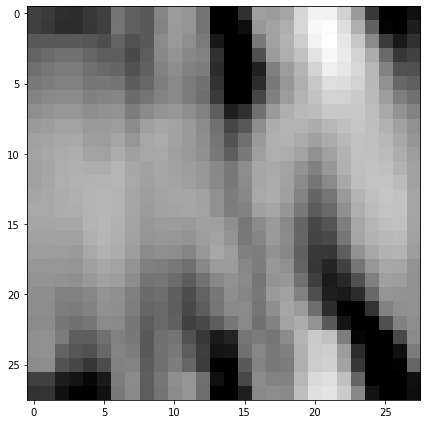

In [22]:
# Index is the index of the class 
 
Index = 1 
 
from tf_keras_vis.activation_maximization import ActivationMaximization 
 
activation_maximization = ActivationMaximization(model, 
                                                 model_modifier, 
                                                 clone=False) 
 
def loss2(output): 
    return output[:, Index] 
 
from tf_keras_vis.utils.callbacks import Print 
 
activation = activation_maximization(loss2, callbacks=[Print(interval=50)]) 
generated_img = activation[0].astype(np.uint8) 
print(generated_img.shape) 
 
plt.figure(figsize = (6,6)) 
plt.imshow(generated_img[:,:,0]) 
plt.tight_layout() 
plt.show()


In order to see better results, we will apply Activation Maximization to VGG16 pretrained with ImageNet. This
part is a parenthesis of the bias analysis. It takes few seconds to execute. Try it with water ouzel, Indian
elephant and fire truck if you have the time.

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  app.launch_new_instance()


Steps: 050	Scores: [[257.8371887207031]],	Regularization: [('TotalVariation2D', [19.733827590942383]), ('Norm', [36.404212951660156])]
Steps: 100	Scores: [[288.9837951660156]],	Regularization: [('TotalVariation2D', [15.184746742248535]), ('Norm', [36.52669143676758])]
Steps: 150	Scores: [[243.04010009765625]],	Regularization: [('TotalVariation2D', [11.910093307495117]), ('Norm', [36.57778549194336])]
Steps: 200	Scores: [[235.03436279296875]],	Regularization: [('TotalVariation2D', [10.253517150878906]), ('Norm', [36.687252044677734])]


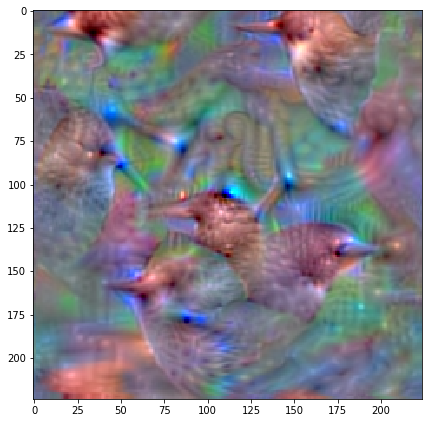

In [24]:
# Pretrained network: VGG16 
from tensorflow.keras.applications import VGG16 
 
# We want to extract the entire network, including the finaly layer. 
modelVGG16 = VGG16(weights='imagenet',include_top=True) 
 
# We show the summary of model (to recall the dimensions) 
modelVGG16.summary() 
 
Index = 20  # Examples of indexes: 20 -> water ouzel; 385 -> Indian elephant; 555 -> fire truck
 
activation_maximization = ActivationMaximization(modelVGG16, 
                                                 model_modifier, 
                                                 clone=False) 
 
activation = activation_maximization(loss2, callbacks=[Print(interval=50)]) 
generated_img = activation[0].astype(np.uint8) 
 
plt.figure(figsize = (6,6)) 
plt.imshow(generated_img) 
plt.tight_layout() 
plt.show()

### t-SNE

<ins> Assignment 3 :</ins> Recall what does the t-SNE method and how it works.

Assignment 3: the t-SNE method maps the training inputs to a 2D space. The ones that are close in this mapped space are the ones that are "alike".

To do so, we define the "probability of two inputs being neighbours", and we try to build a new probability law, close to the previous one (in term of minimization of the KL-divergence), but in lower dimension.

Just execute !

In [25]:
class_definition = {0: 'T-shirt/Top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 
                    4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 
                    9: 'Ankle boot'}

from matplotlib.colors import to_hex

# definition of the scatterplot
def make_scatterplot(X, y, feature1=None, feature2=None, 
                     class_indices=None, class_definition=None):
    if class_indices is None:
        class_indices = np.unique(y)
    if class_definition is None:
        class_definition = dict(zip(class_indices, [str(i) for i in class_indices]))
    if feature1 is None:
        feature1 = 'Component 1'
    if feature2 is None:
        feature2 = 'Component 2'

    # colors
    colors = plt.cm.get_cmap('tab10', 10).colors[:,:3]

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title('Scatter plot: %s vs. %s' % (feature2, feature1))

    comp1 = X[:,0]
    comp2 = X[:,1]
    for class_index in class_indices:
        class_label = class_definition[class_index]
        ax.scatter(comp1[y==class_index],
                   comp2[y==class_index],
                   c=to_hex(colors[class_index]),
                   label=class_label,
                   s=15)
    ax.legend()
    ax.grid()

In [26]:
from tensorflow.keras.models import Model

# we limit ourselves to 1000 training samples. t-SNE does not scale 
# very well with the number of samples. 
x = x_test[:1000]
y = y_test_n[:1000]

layer_name = 'GAP'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
features = intermediate_layer_model.predict(x)

print(features.shape)

(1000, 64)


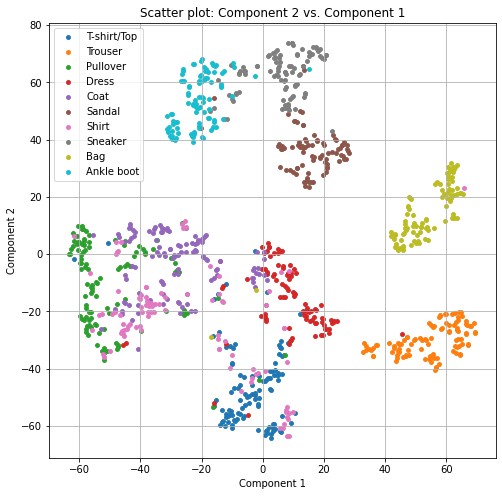

In [27]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(features)
make_scatterplot(X_embedded, y.flatten(), class_definition=class_definition)

<ins> Assignment 4 :</ins> Briefly comment the result obtained.

Assignment 4: the t-SNE method we implemented exactly does what we expect from it. It brings together images that are alike, with some exceptions (ex : a sandal in the sneaker cluster).

## Biased Images

We will now intentionally add a bias to the images, of the fashion MNIST dataset, which is very likely to be learned by the network instead of the clothes. The bias used is obvious in the context of this practical session but it doesn't take more space in the images than an area of grass or clouds in the sky which can reprensent biases for some particular applications. The aim of this part is to see that the bias can be detected using visualization methods.

In [111]:
## Definition of the biased datasets

(x, y), (x_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()

x_val, y_val = x[:10000], y[:10000]
x_train, y_train = x[10000:], y[10000:]


def getBiasedFashionMNIST(x,y):
    
    coloredMNIST = np.zeros((x.shape[0], x.shape[1] + 10, x.shape[2] + 10, 3))
    for i in range(x.shape[0]):
        coloredMNIST[i,5:-5,5:-5,0] = x[i,:,:]
        coloredMNIST[i, :5, :5,0] = (y[i]+1)*25
        coloredMNIST[i,5:-5,5:-5,1] = x[i,:,:]
        coloredMNIST[i, :5, -5:,1] = (250 - y[i]*25)
        coloredMNIST[i,5:-5,5:-5,2] = x[i,:,:]
        coloredMNIST[i, -5:, -5:,2] = (((y[i]+1)*25 + 125)%250)
        
    return coloredMNIST.astype('uint8')

x_train = getBiasedFashionMNIST(x_train, y_train)
x_val = getBiasedFashionMNIST(x_val, y_val)
x_test = getBiasedFashionMNIST(x_test, y_test)

print('x_val shape : ', x_val.shape)
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)

x_val shape :  (10000, 38, 38, 3)
x_train shape :  (50000, 38, 38, 3)
x_test shape :  (10000, 38, 38, 3)


<ins> Assignment 5 :</ins> From preparation of the datasets to the t-SNE method, do exactly the same things we did for the usual fashion MNIST dataset but for the biased fashion MNIST dataset instead. 

From the model training to the t-SNE method, by comparing what you obtain with the results of the first part of the practical session (non-biased case), developpe every difference which can be explained by the bias or which could be used to deduce the bias.

Fill free to used more than one cell for each part.

### Prepare and visualize the data

In [112]:
## your code 

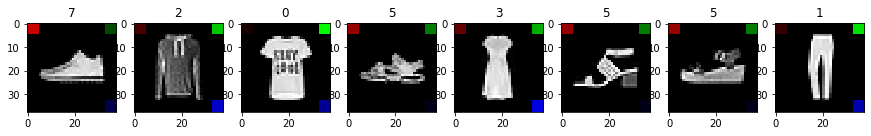

In [113]:
# Show some images of the train datasets

plt.figure(figsize = (15, 10)) 
for i in range(8): 
    plt.subplot(1, 8, i+1), plt.imshow(x_train[i + 5,:,:]), plt.title(y_train_n[i + 5])
plt.show()

In [114]:
print(x_train.shape)

(50000, 38, 38, 3)


In [115]:
## Prepare data for the model 
num_classes = 10 
input_shape = (38, 38, 3)
 
x_train = x_train.astype('float32')/255 
# x_train = tensorflow.expand_dims(x_train, axis = -1) # add a channel dimension
 
x_val = x_val.astype('float32')/255 
# x_val = tensorflow.expand_dims(x_val, axis = -1) # add a channel dimension
 
x_test = x_test.astype('float32')/255 
# x_test = tensorflow.expand_dims(x_test, axis = -1) # add a channel dimension
 
y_train = to_categorical(y_train_n, num_classes) 
y_val = to_categorical(y_val_n, num_classes) 
y_test = to_categorical(y_test_n, num_classes)

### Model definition and training

Use the same architecture used in the first part of the practical session. Don't forget to adapt the input_shape of the model. 20 epochs should be enough to train the model correctly.

I have only executed the code for the dropout model.

In [116]:
## your code 

In [117]:
## Model_dropout
 
model_dropout = Sequential() 
 
model_dropout.add(Conv2D(16, 7, activation='relu', padding = 'same', input_shape=input_shape))
model_dropout.add(MaxPool2D()) 
model_dropout.add(Dropout(0.2))   # uncomment to add the Dropout layer 
model_dropout.add(Conv2D(32, 3, activation='relu', padding = 'same')) 
model_dropout.add(MaxPool2D()) 
model_dropout.add(Dropout(0.2))   # uncomment to add the Dropout layer 
model_dropout.add(Conv2D(64, 3, activation='relu', padding = 'same')) 
model_dropout.add(Dropout(0.1))   # uncomment to add the Dropout layer 
model_dropout.add(GlobalAveragePooling2D(name = 'GAP')) 
model_dropout.add(Dense(num_classes, activation='softmax', name="last")) 
 
model_dropout.summary() # show a summary of the model

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 38, 38, 16)        2368      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 19, 19, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 19, 19, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 19, 19, 32)        4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 64)        

In [118]:
# Define the loss, optimizer and the metric(s) 
learning_rate = 0.001 
model_dropout.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=learning_rate), 
              metrics=['accuracy'])

In [119]:
# Train the model
batch_size = 64 
epochs = 20 
history = model_dropout.fit(x_train, y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, validation_data = (x_val, y_val), verbose = 1)

Epoch 1/20
782/782 [==============================] - 114s 146ms/step - loss: 0.9171 - accuracy: 0.6737 - val_loss: 0.4173 - val_accuracy: 0.8779
Epoch 2/20
782/782 [==============================] - 113s 144ms/step - loss: 0.2913 - accuracy: 0.9133 - val_loss: 0.1357 - val_accuracy: 0.9687
Epoch 3/20
782/782 [==============================] - 113s 145ms/step - loss: 0.1222 - accuracy: 0.9651 - val_loss: 0.0638 - val_accuracy: 0.9840
Epoch 4/20
782/782 [==============================] - 114s 146ms/step - loss: 0.0719 - accuracy: 0.9805 - val_loss: 0.0470 - val_accuracy: 0.9891
Epoch 5/20
782/782 [==============================] - 114s 146ms/step - loss: 0.0492 - accuracy: 0.9863 - val_loss: 0.0187 - val_accuracy: 0.9951
Epoch 6/20
782/782 [==============================] - 114s 145ms/step - loss: 0.0351 - accuracy: 0.9902 - val_loss: 0.0224 - val_accuracy: 0.9929
Epoch 7/20
782/782 [==============================] - 114s 146ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.0114 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

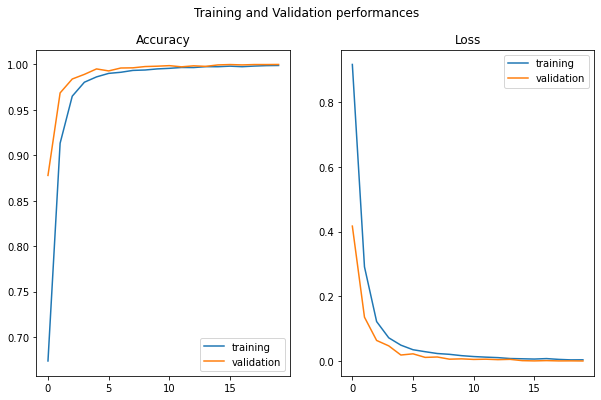

In [120]:
# Show the training curves
plt.figure(figsize = (10, 6))
plt.suptitle('Training and Validation performances')
plt.subplot(1, 2, 1), plt.plot(history.history['accuracy'], label = 'training'), plt.title('Accuracy')
plt.subplot(1, 2, 1), plt.plot(history.history['val_accuracy'], label = 'validation')
plt.subplot(1, 2, 1), plt.legend()
plt.subplot(1, 2, 2), plt.plot(history.history['loss'], label = 'training'), plt.title('Loss')
plt.subplot(1, 2, 2), plt.plot(history.history['val_loss'], label = 'validation')
plt.subplot(1, 2, 2), plt.legend()
plt.show()

In [121]:
# Evaluate the model with the test dataset
score = model_dropout.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0012 - accuracy: 0.9996


Your comment: it has better results (almost perfect) compared to the model without bias. However, it learns the biased data...

### Classification activation maps (grad-CAM)

Use the same test image (but the biased one) used in the non-biased case, i.e., the image 24 of the test dataset.

In [122]:
index_image = 24 # index_image = 24 -> a trouser image.
## your code

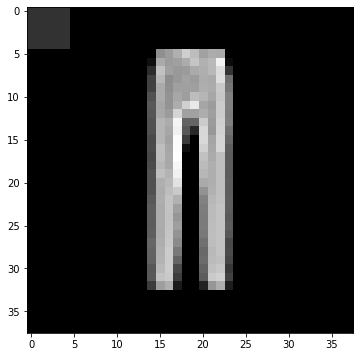

Shape of the prediction :  (1, 10)
Predicted class :  1 ; True class :  1


In [124]:
index_image = 24 # index_image = 24 -> a trouser image.
 
image = x_test[index_image, :,:,:] 
 
plt.figure(figsize = (6,6)) 
plt.imshow(image[:,:,0]) 
plt.show() 
 
image = tensorflow.expand_dims(image, axis = 0) # add a batch dimension.
 
# Predict the output of the image.
prediction = model_dropout.predict(image) 
 
# print the shape of the prediction, the predicted class and the true one.
print('Shape of the prediction : ', prediction.shape)

print('Predicted class : ', np.argmax(prediction), '; True class : ', np.argmax(y_test[index_image]))

In [125]:
def model_modifier(m): 
    m.layers[-1].activation = tensorflow.keras.activations.linear 
    return m 
 
def loss(prediction): 
    # the loss gives the score of the image for the correct class.  
    # if you want to test the importance for the prediction of another class 
    # you have to adapt the index accordingly. 
    correct_class_index = np.argmax(prediction) 
    return prediction[0][correct_class_index]

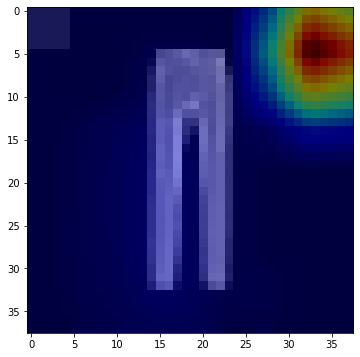

In [126]:
from tf_keras_vis.utils import normalize 
from matplotlib import cm 
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object 
gradcam = Gradcam(model_dropout, 
                  model_modifier=model_modifier, 
                  clone=True) 
 
# Generate heatmap with GradCAM 
cam = gradcam(loss, 
              image, 
              penultimate_layer=-1, # model.layers number 
            ) 
cam = normalize(cam) 
plt.figure(figsize = (6,6)) 
plt.imshow(image[0,:,:,0]) 
heatmap = np.uint8(cm.jet(cam[0]) * 255) 
plt.imshow(heatmap, cmap='jet', alpha=0.5) 
plt.show()

Your comment : unfortunately, the model has learned the colour associated with the class (and not the form of the trouser)...


### Activation maximization

Use the same class used in the non-biased case, i.e., the class having 1 as index value. 

In [ ]:
## your code 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  app.launch_new_instance()


Steps: 050	Scores: [[3969128.0]],	Regularization: [('TotalVariation2D', [42.4303092956543]), ('Norm', [110.42967987060547])]
Steps: 100	Scores: [[5749067.5]],	Regularization: [('TotalVariation2D', [54.6754035949707]), ('Norm', [162.75271606445312])]
Steps: 150	Scores: [[7022138.0]],	Regularization: [('TotalVariation2D', [55.83431625366211]), ('Norm', [201.96475219726562])]
Steps: 200	Scores: [[8262281.0]],	Regularization: [('TotalVariation2D', [52.507381439208984]), ('Norm', [238.07533264160156])]
(38, 38, 3)


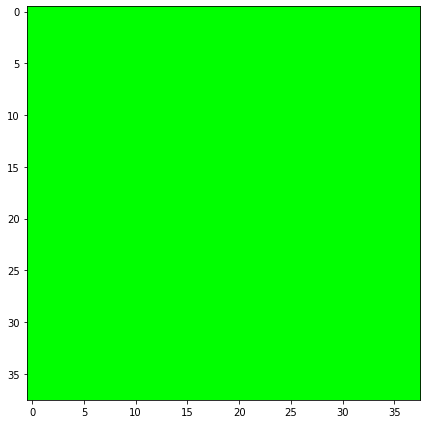

In [128]:
# Index is the index of the class 
 
Index = 1 
 
from tf_keras_vis.activation_maximization import ActivationMaximization 
 
activation_maximization = ActivationMaximization(model_dropout, 
                                                 model_modifier, 
                                                 clone=False) 
 
def loss2(output): 
    return output[:, Index] 
 
from tf_keras_vis.utils.callbacks import Print 
 
activation = activation_maximization(loss2, callbacks=[Print(interval=50)]) 
generated_img = activation[0].astype(np.uint8) 
print(generated_img.shape) 
 
plt.figure(figsize = (6,6)) 
plt.imshow(generated_img[:,:,:]) 
plt.tight_layout() 
plt.show()

Your comment : again, this shows us that the model has learned the colour associated with the bias and not the form of the trouser (finding green is what tells our model that it should return "trouser")

### t-SNE

In [ ]:
## your code 

In [129]:
class_definition = {0: 'T-shirt/Top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 
                    4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 
                    9: 'Ankle boot'}

from matplotlib.colors import to_hex

# definition of the scatterplot
def make_scatterplot(X, y, feature1=None, feature2=None, 
                     class_indices=None, class_definition=None):
    if class_indices is None:
        class_indices = np.unique(y)
    if class_definition is None:
        class_definition = dict(zip(class_indices, [str(i) for i in class_indices]))
    if feature1 is None:
        feature1 = 'Component 1'
    if feature2 is None:
        feature2 = 'Component 2'

    # colors
    colors = plt.cm.get_cmap('tab10', 10).colors[:,:3]

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title('Scatter plot: %s vs. %s' % (feature2, feature1))

    comp1 = X[:,0]
    comp2 = X[:,1]
    for class_index in class_indices:
        class_label = class_definition[class_index]
        ax.scatter(comp1[y==class_index],
                   comp2[y==class_index],
                   c=to_hex(colors[class_index]),
                   label=class_label,
                   s=15)
    ax.legend()
    ax.grid()

In [130]:
from tensorflow.keras.models import Model

# we limit ourselves to 1000 training samples. t-SNE does not scale 
# very well with the number of samples. 
x = x_test[:1000]
y = y_test_n[:1000]

layer_name = 'GAP'
intermediate_layer_model = Model(inputs=model_dropout.input,
                                 outputs=model_dropout.get_layer(layer_name).output)
features = intermediate_layer_model.predict(x)

print(features.shape)

(1000, 64)


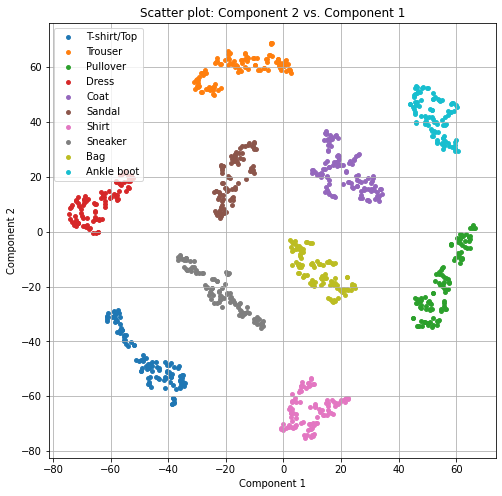

In [131]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(features)
make_scatterplot(X_embedded, y.flatten(), class_definition=class_definition)

Your comment: the t-SNE map shows us that the model classifies well the images. However, as we noticed earlier, it classifies them only using the bias colour... This is what allows him to separate them so easily.